In [ ]:
# Importing required libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

In [6]:
# Load the data
data = pd.read_csv(r'C:\Users\spand\Projects\CAR_DHEKO\All_Cities_Cleaned.csv')
data

,City,Fuel Type,Kms Driven,Transmission,Owner Number,Brand,Price,Seats,Mileage,Engine,Max Power,Torque,Car Age
0,Bangalore,Petrol,120000,Manual,3,Maruti,400000,5,23,998,67,90,10
1,Bangalore,Petrol,32706,Manual,2,Ford,811000,5,17,1497,121,150,7
2,Bangalore,Petrol,11949,Manual,1,Tata,585000,5,23,1199,84,114,7
3,Bangalore,Petrol,17794,Manual,1,Hyundai,462000,5,19,1197,81,113,11
4,Bangalore,Diesel,60000,Manual,1,Maruti,790000,5,23,1248,88,200,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8221,Kolkata,Petrol,10000,Manual,1,Maruti,509999,5,25,998,65,89,3
8222,Kolkata,Petrol,120000,Manual,1,Maruti,180000,5,22,796,47,69,11
8223,Kolkata,Petrol,50000,Automatic,3,Mercedes-Benz,550000,5,11,1796,178,285,14
8224,Kolkata,Petrol,40000,Manual,1,Maruti,140000,5,18,1197,85,114,13


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Kms Driven,8226.0,57742.269025,33743.823826,101.0,30128.75,53919.0,80000.0,154806.0
Owner Number,8226.0,1.358254,0.638504,0.0,1.00,1.0,2.0,5.0
Price,8226.0,747981.553124,488156.230471,28000.0,400000.00,600000.0,950000.0,1775000.0
Seats,8226.0,5.203380,0.663851,2.0,5.00,5.0,5.0,10.0
Mileage,8226.0,18.809871,3.473681,11.0,17.00,19.0,21.0,27.0
Engine,8226.0,1372.404571,333.368080,745.0,1197.00,1248.0,1498.0,1949.0
Max Power,8226.0,101.344882,35.825648,25.0,78.00,88.0,118.0,178.0
Torque,8226.0,171.171165,92.894976,4.0,110.00,140.0,215.0,372.0
Car Age,8226.0,8.496839,3.903960,2.0,6.00,8.0,11.0,40.0


In [8]:
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']
categorical_features

['City', 'Fuel Type', 'Transmission', 'Brand']

In [9]:
columns_to_encode = ['Transmission', 'Brand', 'Fuel Type', 'City']

label_encoders = {} # Dictionary to store encoders for each column

for column in columns_to_encode:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])  
    label_encoders[column] = le  # Store encoder for this column

In [10]:
# Feature Matrix & Target variable
y = data['Price']
X = data.drop(columns=['Price'], axis=1)

In [11]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6580, 12)
(1646, 12)
(6580,)
(1646,)


In [12]:
# Scaling features that have large ranges & are on different scales using Min-Max Scaler
columns_to_scale = ['Kms Driven', 'Mileage', 'Engine', 'Max Power', 'Torque', 'Car Age']

mm_scaler = MinMaxScaler()
X_train[columns_to_scale] = mm_scaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = mm_scaler.transform(X_test[columns_to_scale])

### Building models

In [13]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [14]:
# Predticing using the model
y_train_lr_pred = lr.predict(X_train)
y_test_lr_pred = lr.predict(X_test)

print('Predictions made on X_train data\n', y_train_lr_pred, '\n')
print('Predictions made on X_test data\n', y_test_lr_pred)

Predictions made on X_train data
 [ 415860.02052874  233751.25904779 1054624.91011691 ...  996227.16499853
  655367.2243237   582190.31649446] 

Predictions made on X_test data
 [451434.82464191 -49657.61098797 696782.6448556  ... 477677.63935839
 159469.39855216 918354.37638559]


In [15]:
# Model Evaluation
print(y_train, '\n') # actual values
print(y_train_lr_pred) # predicted values

1832    508000
1755    600000
2513    740000
5106    724000
681     900000
         ...  
5734    195000
5191    390000
5390    760000
860     375000
7270    600000
Name: Price, Length: 6580, dtype: int64 

[ 415860.02052874  233751.25904779 1054624.91011691 ...  996227.16499853
  655367.2243237   582190.31649446]


In [16]:
# mse, mae & r2 score for train data
lr_train_mse = mean_squared_error(y_train, y_train_lr_pred)
lr_train_mae = mean_absolute_error(y_train, y_train_lr_pred)
lr_train_r2 = r2_score(y_train, y_train_lr_pred)

print('MSE:',lr_train_mse)
print('MAE:',lr_train_mae)
print('R2:',lr_train_r2)

MSE: 33452924911.6364
MAE: 133941.3327864209
R2: 0.85649036918739


In [17]:
# mse, mae & r2 score for test data
lr_test_mse = mean_squared_error(y_test, y_test_lr_pred)
lr_test_mae = mean_absolute_error(y_test, y_test_lr_pred)
lr_test_r2 = r2_score(y_test, y_test_lr_pred)

print('MSE:',lr_test_mse)
print('MAE:',lr_test_mae)
print('R2:',lr_test_r2)

MSE: 36002368377.929436
MAE: 136184.0695990773
R2: 0.860823753267747


In [18]:
lr_results = pd.DataFrame(['Linear Regression', lr_train_mse, lr_train_mae, lr_train_r2, lr_test_mse, lr_test_mae, lr_test_r2]).T
lr_results.columns = ['Model', 'Training MSE', 'Training MAE', 'Training R2', 'Testing MSE', 'Testing MAE', 'Testing R2']
lr_results

,Model,Training MSE,Training MAE,Training R2,Testing MSE,Testing MAE,Testing R2
0,Linear Regression,33452924911.636398,133941.332786,0.85649,36002368377.929436,136184.069599,0.860824


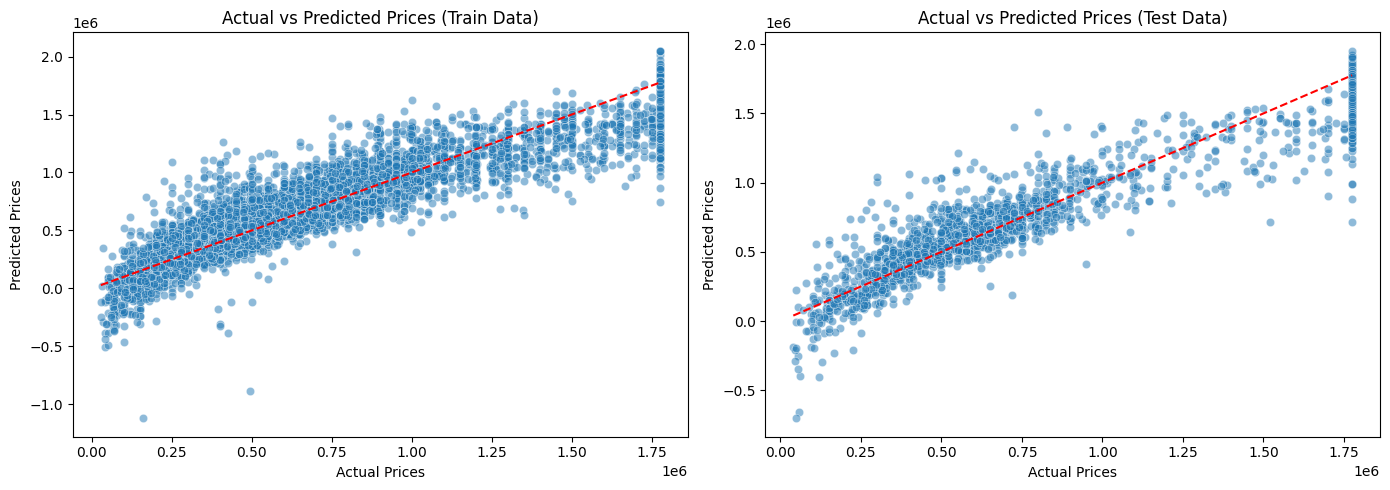

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5)) 

# Train Data Plot
sns.scatterplot(ax=axes[0], x=y_train, y=y_train_lr_pred, alpha=0.5)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--')  # Reference line
axes[0].set_xlabel("Actual Prices")
axes[0].set_ylabel("Predicted Prices")
axes[0].set_title("Actual vs Predicted Prices (Train Data)")

# Test Data Plot
sns.scatterplot(ax=axes[1], x=y_test, y=y_test_lr_pred, alpha=0.5)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Reference line
axes[1].set_xlabel("Actual Prices")
axes[1].set_ylabel("Predicted Prices")
axes[1].set_title("Actual vs Predicted Prices (Test Data)")

plt.tight_layout()  
plt.show()

In [20]:
# Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [21]:
# Predticing using the model
y_train_dt_pred = dt.predict(X_train)
y_test_dt_pred = dt.predict(X_test)

print('Predictions made on X_train data\n', y_train_dt_pred, '\n')
print('Predictions made on X_test data\n', y_test_dt_pred)

Predictions made on X_train data
 [508000. 600000. 740000. ... 760000. 375000. 600000.] 

Predictions made on X_test data
 [340000. 195000. 594000. ... 554000. 170000. 888000.]


In [22]:
# Model Evaluation
print(y_train, '\n') # actual values
print(y_train_dt_pred) # predicted values

1832    508000
1755    600000
2513    740000
5106    724000
681     900000
         ...  
5734    195000
5191    390000
5390    760000
860     375000
7270    600000
Name: Price, Length: 6580, dtype: int64 

[508000. 600000. 740000. ... 760000. 375000. 600000.]


In [23]:
# mse, mae & r2 score for train data
dt_train_mse = mean_squared_error(y_train, y_train_dt_pred)
dt_train_mae = mean_absolute_error(y_train, y_train_dt_pred)
dt_train_r2 = r2_score(y_train, y_train_dt_pred)

print('MSE:',dt_train_mse)
print('MAE:',dt_train_mae)
print('R2:',dt_train_r2)

MSE: 79194076.59589666
MAE: 778.3181357649444
R2: 0.9996602655007045


In [24]:
# mse, mae & r2 score for test data
dt_test_mse = mean_squared_error(y_test, y_test_dt_pred)
dt_test_mae = mean_absolute_error(y_test, y_test_dt_pred)
dt_test_r2 = r2_score(y_test, y_test_dt_pred)

print('MSE:',dt_test_mse)
print('MAE:',dt_test_mae)
print('R2:',dt_test_r2)

MSE: 27029514053.671997
MAE: 94565.66929931146
R2: 0.8955105875953179


In [25]:
dt_results = pd.DataFrame(['Decision Tree', dt_train_mse, dt_train_mae, dt_train_r2, dt_test_mse, dt_test_mae, dt_test_r2]).T
dt_results.columns = ['Model', 'Training MSE', 'Training MAE', 'Training R2', 'Testing MSE', 'Testing MAE', 'Testing R2']
dt_results

,Model,Training MSE,Training MAE,Training R2,Testing MSE,Testing MAE,Testing R2
0,Decision Tree,79194076.595897,778.318136,0.99966,27029514053.671997,94565.669299,0.895511


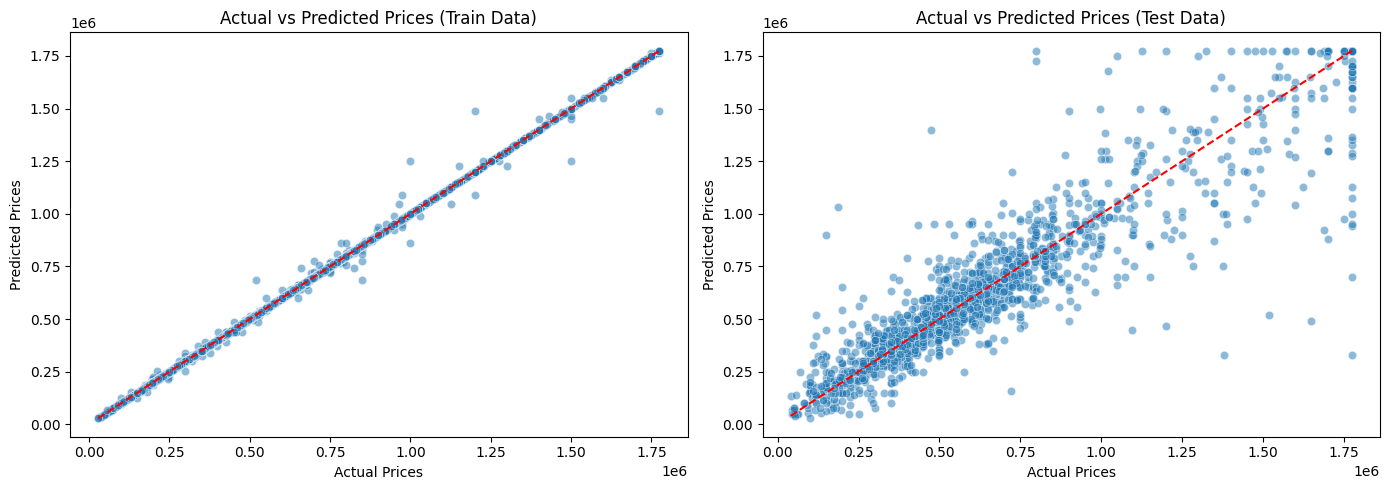

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  

# Train Data Plot
sns.scatterplot(ax=axes[0], x=y_train, y=y_train_dt_pred, alpha=0.5)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--')  # Reference line
axes[0].set_xlabel("Actual Prices")
axes[0].set_ylabel("Predicted Prices")
axes[0].set_title("Actual vs Predicted Prices (Train Data)")

# Test Data Plot
sns.scatterplot(ax=axes[1], x=y_test, y=y_test_dt_pred, alpha=0.5)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Reference line
axes[1].set_xlabel("Actual Prices")
axes[1].set_ylabel("Predicted Prices")
axes[1].set_title("Actual vs Predicted Prices (Test Data)")

plt.tight_layout()  
plt.show()

In [27]:
# Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [28]:
# Predticing using the model
y_train_rf_pred = rf.predict(X_train)
y_test_rf_pred = rf.predict(X_test)

print('Predictions made on X_train data\n', y_train_rf_pred, '\n')
print('Predictions made on X_test data\n', y_test_rf_pred)

Predictions made on X_train data
 [489079.99 535284.99 801809.97 ... 761239.87 383145.   618570.  ] 

Predictions made on X_test data
 [417439.92 134240.01 554799.84 ... 538550.   156120.   872130.  ]


In [29]:
# Model Evaluation
print(y_train, '\n') # actual values
print(y_train_rf_pred) # predicted values

1832    508000
1755    600000
2513    740000
5106    724000
681     900000
         ...  
5734    195000
5191    390000
5390    760000
860     375000
7270    600000
Name: Price, Length: 6580, dtype: int64 

[489079.99 535284.99 801809.97 ... 761239.87 383145.   618570.  ]


In [30]:
# mse, mae & r2 score for train data
rf_train_mse = mean_squared_error(y_train, y_train_rf_pred)
rf_train_mae = mean_absolute_error(y_train, y_train_rf_pred)
rf_train_r2 = r2_score(y_train, y_train_rf_pred)

print('MSE:',rf_train_mse)
print('MAE:',rf_train_mae)
print('R2:',rf_train_r2)

MSE: 1940890920.7645614
MAE: 27369.704625441456
R2: 0.9916737762027624


In [31]:
# mse, mae & r2 score for test data
rf_test_mse = mean_squared_error(y_test, y_test_rf_pred)
rf_test_mae = mean_absolute_error(y_test, y_test_rf_pred)
rf_test_r2 = r2_score(y_test, y_test_rf_pred)

print('MSE:',rf_test_mse)
print('MAE:',rf_test_mae)
print('R2:',rf_test_r2)

MSE: 14601789210.830551
MAE: 74323.74345460859
R2: 0.9435530963794949


In [32]:
rf_results = pd.DataFrame(['Random Forest', rf_train_mse, rf_train_mae, rf_train_r2, rf_test_mse, rf_test_mae, rf_test_r2]).T
rf_results.columns = ['Model', 'Training MSE', 'Training MAE', 'Training R2', 'Testing MSE', 'Testing MAE', 'Testing R2']
rf_results

,Model,Training MSE,Training MAE,Training R2,Testing MSE,Testing MAE,Testing R2
0,Random Forest,1940890920.764561,27369.704625,0.991674,14601789210.830551,74323.743455,0.943553


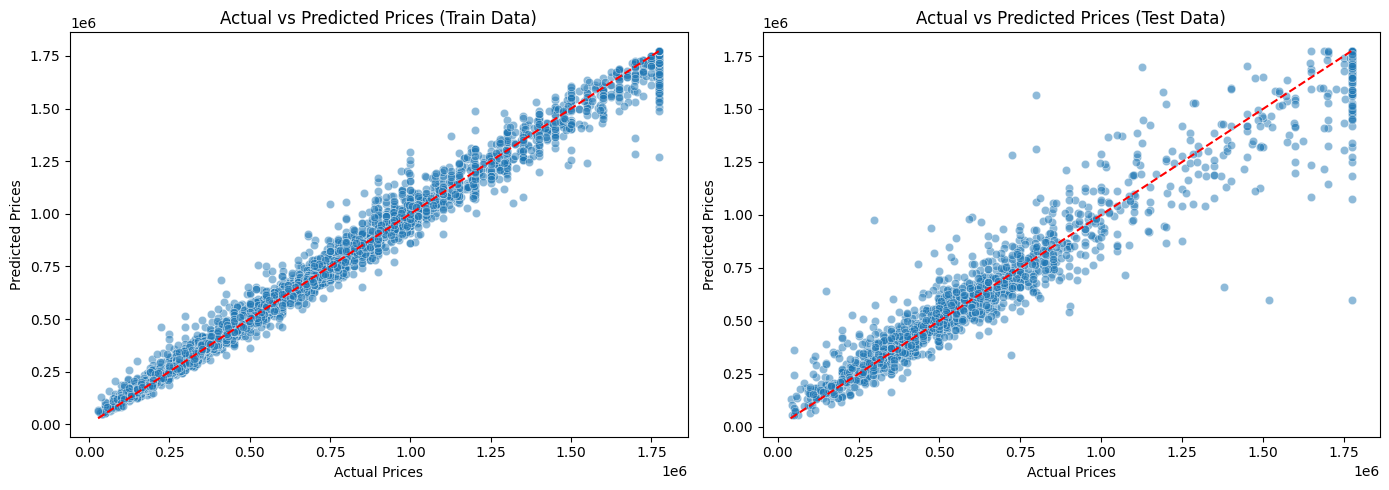

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  

# Train Data Plot
sns.scatterplot(ax=axes[0], x=y_train, y=y_train_rf_pred, alpha=0.5)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--')  # Reference line
axes[0].set_xlabel("Actual Prices")
axes[0].set_ylabel("Predicted Prices")
axes[0].set_title("Actual vs Predicted Prices (Train Data)")

# Test Data Plot
sns.scatterplot(ax=axes[1], x=y_test, y=y_test_rf_pred, alpha=0.5)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Reference line
axes[1].set_xlabel("Actual Prices")
axes[1].set_ylabel("Predicted Prices")
axes[1].set_title("Actual vs Predicted Prices (Test Data)")

plt.tight_layout() 
plt.show()

In [34]:
# Gradient Boosting Regressor
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [35]:
# Predticing using the model
y_train_gb_pred = gb.predict(X_train)
y_test_gb_pred = gb.predict(X_test)

print('Predictions made on X_train data\n', y_train_gb_pred, '\n')
print('Predictions made on X_test data\n', y_test_gb_pred)

Predictions made on X_train data
 [428652.68889468 560186.1854363  835489.42604408 ... 820226.84133136
 427034.58422038 603009.60825778] 

Predictions made on X_test data
 [411943.96943214 132138.51225193 564682.38133353 ... 504433.89271284
 204740.72951305 908709.98318225]


In [36]:
# Model Evaluation
print(y_train, '\n') # actual values
print(y_train_gb_pred) # predicted values

1832    508000
1755    600000
2513    740000
5106    724000
681     900000
         ...  
5734    195000
5191    390000
5390    760000
860     375000
7270    600000
Name: Price, Length: 6580, dtype: int64 

[428652.68889468 560186.1854363  835489.42604408 ... 820226.84133136
 427034.58422038 603009.60825778]


In [37]:
# mse, mae & r2 score for train data
gb_train_mse = mean_squared_error(y_train, y_train_gb_pred)
gb_train_mae = mean_absolute_error(y_train, y_train_gb_pred)
gb_train_r2 = r2_score(y_train, y_train_gb_pred)

print('MSE:',gb_train_mse)
print('MAE:',gb_train_mae)
print('R2:',gb_train_r2)

MSE: 13715429743.081848
MAE: 80942.46879503579
R2: 0.9411622073685608


In [38]:
# mse, mae & r2 score for test data
gb_test_mse = mean_squared_error(y_test, y_test_gb_pred)
gb_test_mae = mean_absolute_error(y_test, y_test_gb_pred)
gb_test_r2 = r2_score(y_test, y_test_gb_pred)

print('MSE:',gb_test_mse)
print('MAE:',gb_test_mae)
print('R2:',gb_test_r2)

MSE: 17314969419.742607
MAE: 87804.48456972573
R2: 0.9330646131158189


In [39]:
gb_results = pd.DataFrame(['Gradient Boosting', gb_train_mse, gb_train_mae, gb_train_r2, gb_test_mse, gb_test_mae, gb_test_r2]).T
gb_results.columns = ['Model', 'Training MSE', 'Training MAE', 'Training R2', 'Testing MSE', 'Testing MAE', 'Testing R2']
gb_results

,Model,Training MSE,Training MAE,Training R2,Testing MSE,Testing MAE,Testing R2
0,Gradient Boosting,13715429743.081848,80942.468795,0.941162,17314969419.742607,87804.48457,0.933065


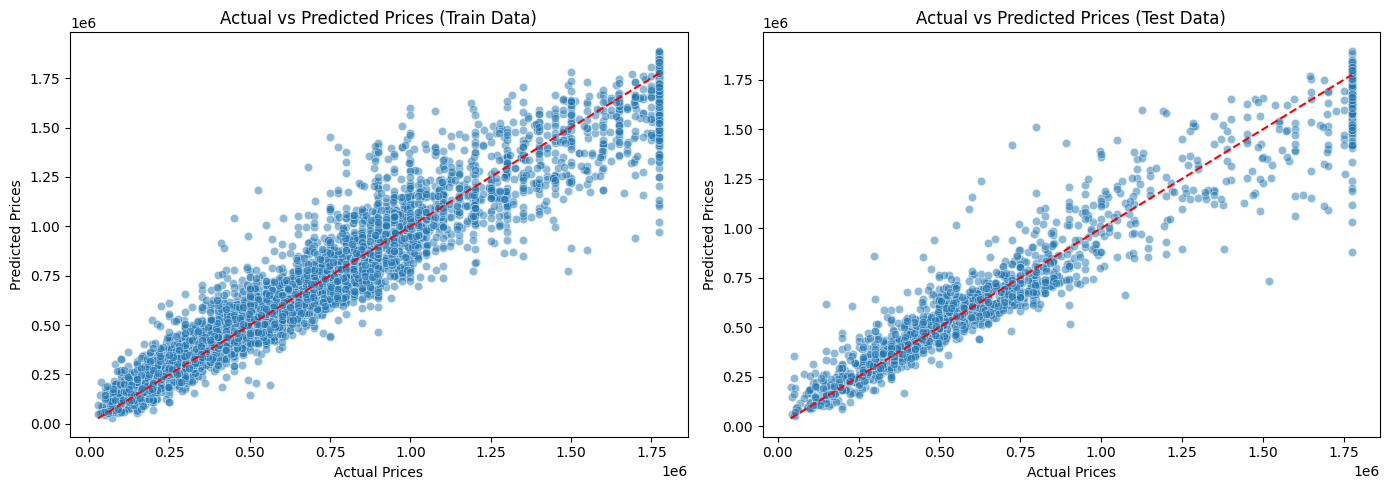

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # Create a figure with 1 row & 2 columns

# Train Data Plot
sns.scatterplot(ax=axes[0], x=y_train, y=y_train_gb_pred, alpha=0.5)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--')  # Reference line
axes[0].set_xlabel("Actual Prices")
axes[0].set_ylabel("Predicted Prices")
axes[0].set_title("Actual vs Predicted Prices (Train Data)")

# Test Data Plot
sns.scatterplot(ax=axes[1], x=y_test, y=y_test_gb_pred, alpha=0.5)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Reference line
axes[1].set_xlabel("Actual Prices")
axes[1].set_ylabel("Predicted Prices")
axes[1].set_title("Actual vs Predicted Prices (Test Data)")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

### Comparing Different Models

In [41]:
model_comparision = pd.concat([lr_results, dt_results, rf_results, gb_results], axis = 0).reset_index(drop=True)
model_comparision

,Model,Training MSE,Training MAE,Training R2,Testing MSE,Testing MAE,Testing R2
0,Linear Regression,33452924911.636398,133941.332786,0.85649,36002368377.929436,136184.069599,0.860824
1,Decision Tree,79194076.595897,778.318136,0.99966,27029514053.671997,94565.669299,0.895511
2,Random Forest,1940890920.764561,27369.704625,0.991674,14601789210.830551,74323.743455,0.943553
3,Gradient Boosting,13715429743.081848,80942.468795,0.941162,17314969419.742607,87804.48457,0.933065


#### **📌 Model-Specific Analysis**

**1️) Linear Regression**
- Training R² = 0.856  → 85.6% of variance in training data.
- Testing R² = 0.860 → Slightly better fit on test data.
- Issue → High MSE & MAE, indicates that the model doesn’t capture nonlinear relationships effectively.
- ***Inference* → Linear Regression assumes a straight-line relationship between features & target. Since the dataset is non-linear, this model struggles to capture the full complexity.**

**2️) Decision Tree**
- Training R² = 0.999 → Almost perfectly fits training data.
- Testing R² = 0.895 → Huge drop, showing overfitting.
- Issue → Overfitting Model memorized training data but fails to generalize.
- ***Inference* → Extreme overfitting on train data & poor generalization to unseen data**

**3️) Random Forest**
- Training R² = 0.991 → High but less overfit than Decision Tree
- Testing R² = 0.943 → Good but shows gap, fails to generalize
- Issue: Overfitting but much better than Decision Tree.
- ***Inference* → The testing MSE & MAE are lower than Decision Tree, meaning it makes better predictions.**

**4️) Gradient Boosting**
- Training R² = 0.941  → Lower than Random Forest (suggests less overfitting).
- Testing R² = 0.933 → Good generalization, slightly lower than Random Forest.
- Issue → High Train & Test MAE than RF indicating large error range but performance is stable.
- ***Inference* → MSE & MAE are slightly worse than Random Forest, but still better than Decision Tree & Linear Regression.**
  
### ***Let's consider Random Forest for further hyperparameter tuning!***

### Model Optimization

#### Feature Engineering

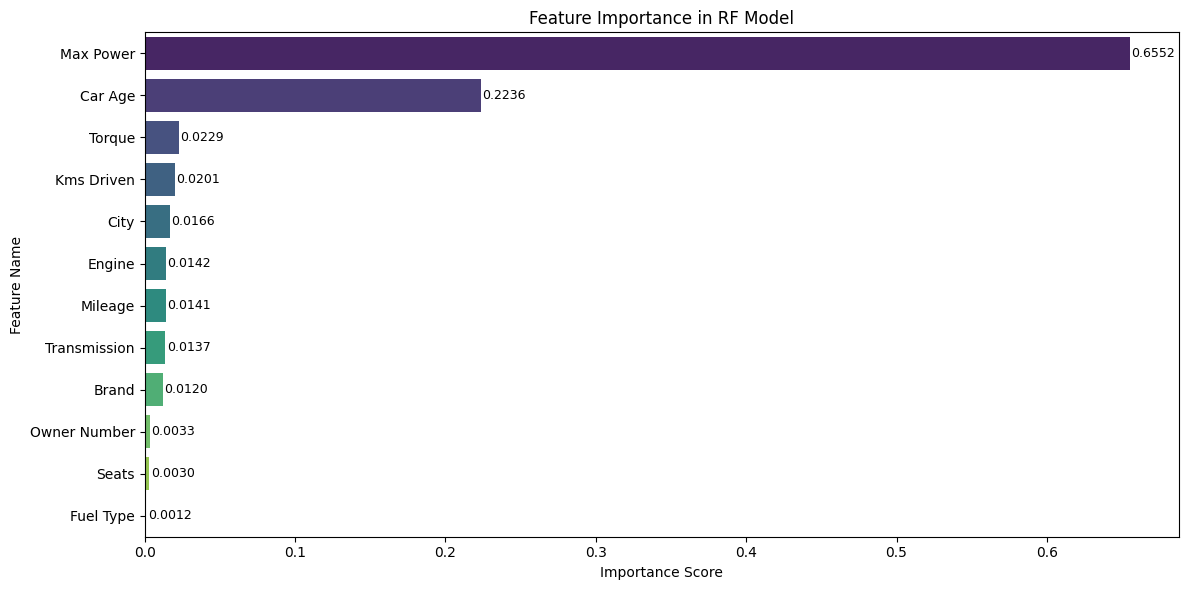

In [42]:
# Extract feature importance
feature_importance = rf.feature_importances_
features = X_train.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance}).sort_values(by='Importance', ascending=False)

# Plot feature importance 
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, hue='Feature', palette='viridis', legend=False)

for index, value in enumerate(importance_df['Importance']):
    plt.text(value + 0.001, index, f'{value:.4f}', va='center', fontsize=9)

plt.title("Feature Importance in RF Model")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.tight_layout()
plt.show()

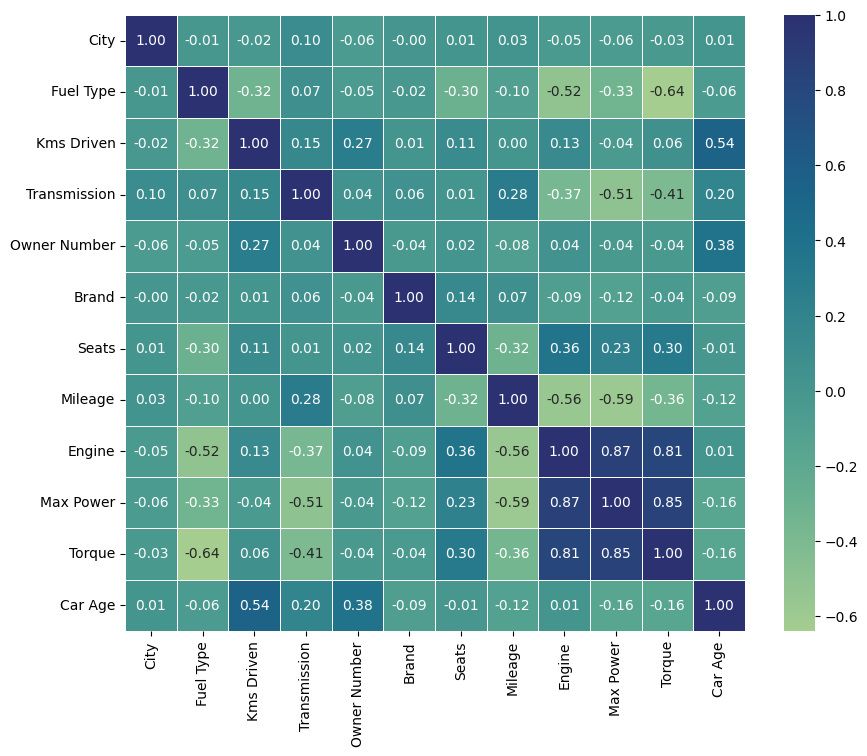

In [43]:
# Checking Multicollinearity 
corr_matrix = X_train.corr() 

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="crest", fmt=".2f", linewidth = 0.5)
plt.show()

In [44]:
df = data.copy()

# Create New Features
df['Age vs Performance'] = df['Car Age'] * df['Mileage'] # Older cars may have reduced efficiency
df['Fuel Efficiency'] = df['Mileage'] / df['Engine'] # Smaller engines with higher mileage are more efficient

# Dropping Fuel Type & Seats as it has low importance & Torque as it has a strong correlation with Max Power 
df.drop(columns=['Torque', 'Seats', 'Fuel Type'], inplace=True)
df

,City,Kms Driven,Transmission,Owner Number,Brand,Price,Mileage,Engine,Max Power,Car Age,Age vs Performance,Fuel Efficiency
0,0,120000,1,3,20,400000,23,998,67,10,230,0.023046
1,0,32706,1,2,6,811000,17,1497,121,7,119,0.011356
2,0,11949,1,1,29,585000,23,1199,84,7,161,0.019183
3,0,17794,1,1,9,462000,19,1197,81,11,209,0.015873
4,0,60000,1,1,20,790000,23,1248,88,10,230,0.018429
...,...,...,...,...,...,...,...,...,...,...,...,...
8221,5,10000,1,1,20,509999,25,998,65,3,75,0.025050
8222,5,120000,1,1,20,180000,22,796,47,11,242,0.027638
8223,5,50000,0,3,21,550000,11,1796,178,14,154,0.006125
8224,5,40000,1,1,20,140000,18,1197,85,13,234,0.015038


In [45]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
City,8226.0,2.410771,1.702814,0.000000,1.000000,2.000000,4.000000,5.000000e+00
Kms Driven,8226.0,57742.269025,33743.823826,101.000000,30128.750000,53919.000000,80000.000000,1.548060e+05
Transmission,8226.0,0.725383,0.446348,0.000000,0.000000,1.000000,1.000000,1.000000e+00
Owner Number,8226.0,1.358254,0.638504,0.000000,1.000000,1.000000,2.000000,5.000000e+00
Brand,8226.0,16.145028,8.516674,0.000000,9.000000,17.000000,20.000000,3.200000e+01
Price,8226.0,747981.553124,488156.230471,28000.000000,400000.000000,600000.000000,950000.000000,1.775000e+06
Mileage,8226.0,18.809871,3.473681,11.000000,17.000000,19.000000,21.000000,2.700000e+01
Engine,8226.0,1372.404571,333.368080,745.000000,1197.000000,1248.000000,1498.000000,1.949000e+03
Max Power,8226.0,101.344882,35.825648,25.000000,78.000000,88.000000,118.000000,1.780000e+02
Car Age,8226.0,8.496839,3.903960,2.000000,6.000000,8.000000,11.000000,4.000000e+01


In [46]:
df.isnull().sum()

City                  0
Kms Driven            0
Transmission          0
Owner Number          0
Brand                 0
Price                 0
Mileage               0
Engine                0
Max Power             0
Car Age               0
Age vs Performance    0
Fuel Efficiency       0
dtype: int64

In [47]:
# Feature Matrix & Target variable
y = df['Price']
X = df.drop(columns=['Price'], axis=1)

In [48]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6580, 11)
(1646, 11)
(6580,)
(1646,)


In [49]:
# Normalizing features that have large ranges & are on different scales using Min-Max Scaler
columns_to_scale = ['Kms Driven', 'Mileage', 'Engine', 'Max Power', 'Car Age', 'Age vs Performance', 'Fuel Efficiency']

mm_scaler = MinMaxScaler()
X_train[columns_to_scale] = mm_scaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = mm_scaler.transform(X_test[columns_to_scale])

In [50]:
# Random Forest Regressor
rf_b = RandomForestRegressor(random_state=42)
rf_b.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [51]:
# Predticing using the model
y_train_rf_b_pred = rf_b.predict(X_train)
y_test_rf_b_pred = rf_b.predict(X_test)

print('Predictions made on X_train data\n', y_train_rf_b_pred, '\n')
print('Predictions made on X_test data\n', y_test_rf_b_pred)

Predictions made on X_train data
 [486849.99 519364.99 782804.99 ... 755569.98 380544.98 663799.99] 

Predictions made on X_test data
 [412719.94       138316.65666667 570239.94       ... 539000.
 156380.         879230.        ]


In [52]:
# mse, mae & r2 score for train data
rf_b_train_mse = mean_squared_error(y_train, y_train_rf_b_pred)
rf_b_train_mae = mean_absolute_error(y_train, y_train_rf_b_pred)
rf_b_train_r2 = r2_score(y_train, y_train_rf_b_pred)

print('MSE:',rf_b_train_mse)
print('MAE:',rf_b_train_mae)
print('R2:',rf_b_train_r2)

MSE: 1984920610.4645433
MAE: 27729.026018537414
R2: 0.9914848933313744


In [53]:
# mse, mae & r2 score for test data
rf_b_test_mse = mean_squared_error(y_test, y_test_rf_b_pred)
rf_b_test_mae = mean_absolute_error(y_test, y_test_rf_b_pred)
rf_b_test_r2 = r2_score(y_test, y_test_rf_b_pred)

print('MSE:',rf_b_test_mse)
print('MAE:',rf_b_test_mae)
print('R2:',rf_b_test_r2)

MSE: 15628305061.017286
MAE: 76781.86709954869
R2: 0.9395848401320048


In [54]:
rf_b_results = pd.DataFrame(['Random Forest (Base)', rf_b_train_mse, rf_b_train_mae, rf_b_train_r2, rf_b_test_mse, rf_b_test_mae, rf_b_test_r2]).T
rf_b_results.columns = ['Model', 'Training MSE', 'Training MAE', 'Training R2', 'Testing MSE', 'Testing MAE', 'Testing R2']
rf_b_results

,Model,Training MSE,Training MAE,Training R2,Testing MSE,Testing MAE,Testing R2
0,Random Forest (Base),1984920610.464543,27729.026019,0.991485,15628305061.017286,76781.8671,0.939585


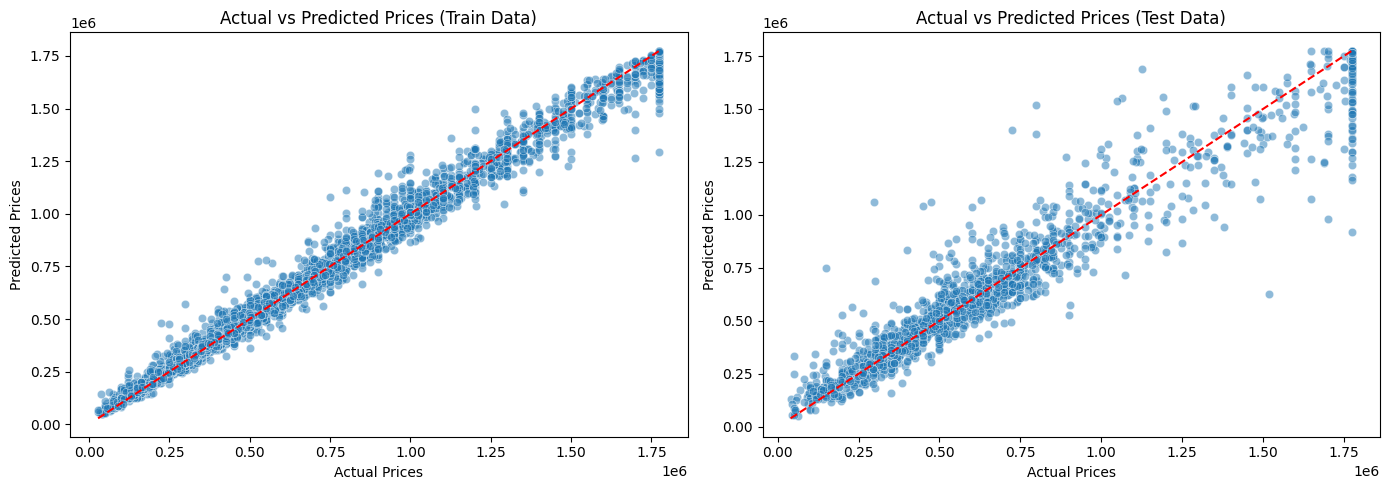

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  

# Train Data Plot
sns.scatterplot(ax=axes[0], x=y_train, y=y_train_rf_b_pred, alpha=0.5)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--')  # Reference line
axes[0].set_xlabel("Actual Prices")
axes[0].set_ylabel("Predicted Prices")
axes[0].set_title("Actual vs Predicted Prices (Train Data)")

# Test Data Plot
sns.scatterplot(ax=axes[1], x=y_test, y=y_test_rf_b_pred, alpha=0.5)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Reference line
axes[1].set_xlabel("Actual Prices")
axes[1].set_ylabel("Predicted Prices")
axes[1].set_title("Actual vs Predicted Prices (Test Data)")

plt.tight_layout() 
plt.show()

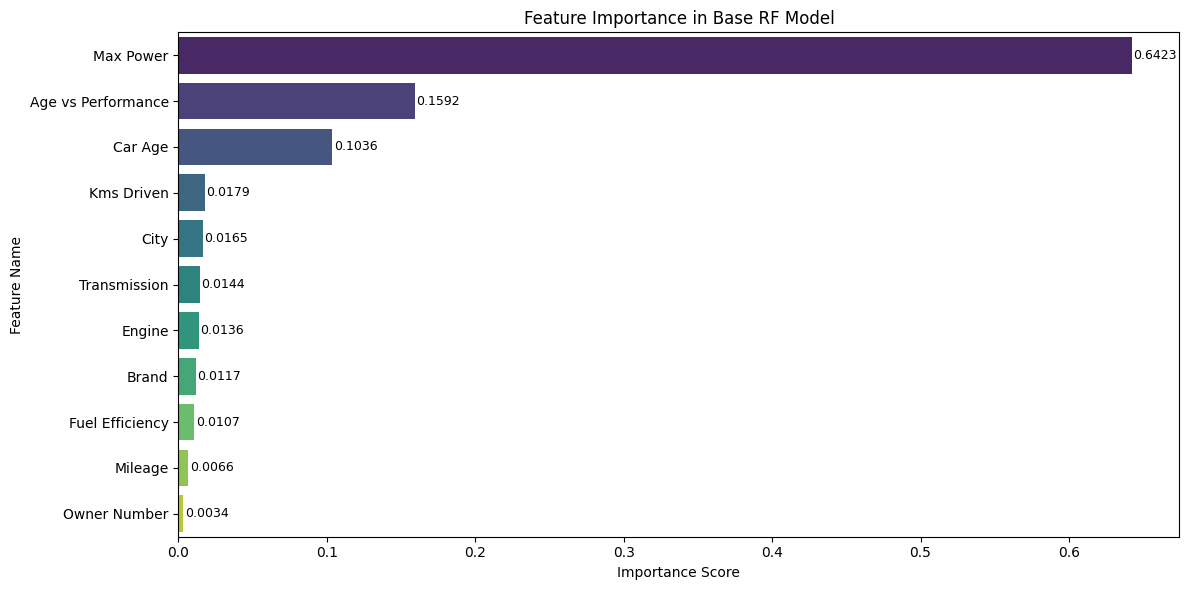

In [56]:
# Extract feature importance
feature_importance = rf_b.feature_importances_
features = X_train.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance}).sort_values(by='Importance', ascending=False)

# Plot feature importance 
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, hue='Feature', palette='viridis', legend=False)

for index, value in enumerate(importance_df['Importance']):
    plt.text(value + 0.001, index, f'{value:.4f}', va='center', fontsize=9)

plt.title("Feature Importance in Base RF Model")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.tight_layout()
plt.show()

In [57]:
# Define base Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # RF trees
    'max_depth': [10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'max_features': ['log2', 'sqrt'],
    'ccp_alpha': [0.0, 0.001, 0.01, 0.1, 0.5, 1.0] 
}

# Use RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_model, 
    param_distributions=param_grid, 
    n_iter=100,  
    cv=5, 
    scoring='neg_mean_squared_error',
    verbose=2, 
    random_state=42, 
    n_jobs=-1
)

random_search.fit(X_train, y_train)
print("Best Parameters:", random_search.best_params_)
hp_rf = random_search.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20, 'ccp_alpha': 0.5}


In [58]:
# Predticing using the model
y_train_hp_rf_pred = hp_rf.predict(X_train)
y_test_hp_rf_pred = hp_rf.predict(X_test)

print('Predictions made on X_train data\n', y_train_hp_rf_pred, '\n')
print('Predictions made on X_test data\n', y_test_hp_rf_pred)

Predictions made on X_train data
 [486374.78066728 548790.17357143 786312.49       ... 755939.975
 382978.32233333 669129.995     ] 

Predictions made on X_test data
 [399190.98016417 146388.54166667 590767.475      ... 531449.02368673
 172167.84940091 861836.6715    ]


In [59]:
# mse, mae & r2 score for train data
hp_rf_train_mse = mean_squared_error(y_train, y_train_hp_rf_pred)
hp_rf_train_mae = mean_absolute_error(y_train, y_train_hp_rf_pred)
hp_rf_train_r2 = r2_score(y_train, y_train_hp_rf_pred)

print('MSE:',hp_rf_train_mse)
print('MAE:',hp_rf_train_mae)
print('R2:',hp_rf_train_r2, '\n')

# mse, mae & r2 score for test data
hp_rf_test_mse = mean_squared_error(y_test, y_test_hp_rf_pred)
hp_rf_test_mae = mean_absolute_error(y_test, y_test_hp_rf_pred)
hp_rf_test_r2 = r2_score(y_test, y_test_hp_rf_pred)

print('MSE:',hp_rf_test_mse)
print('MAE:',hp_rf_test_mae)
print('R2:',hp_rf_test_r2)

MSE: 1966890632.243973
MAE: 28787.331242367196
R2: 0.9915622400962635 

MSE: 15230121670.254887
MAE: 77385.68018898694
R2: 0.941124118583236


In [60]:
hp_rf_results = pd.DataFrame(['HP Tuned RF', hp_rf_train_mse, hp_rf_train_mae, hp_rf_train_r2, hp_rf_test_mse, hp_rf_test_mae, hp_rf_test_r2]).T
hp_rf_results.columns = ['Model', 'Training MSE', 'Training MAE', 'Training R2', 'Testing MSE', 'Testing MAE', 'Testing R2']
hp_rf_results

,Model,Training MSE,Training MAE,Training R2,Testing MSE,Testing MAE,Testing R2
0,HP Tuned RF,1966890632.243973,28787.331242,0.991562,15230121670.254887,77385.680189,0.941124


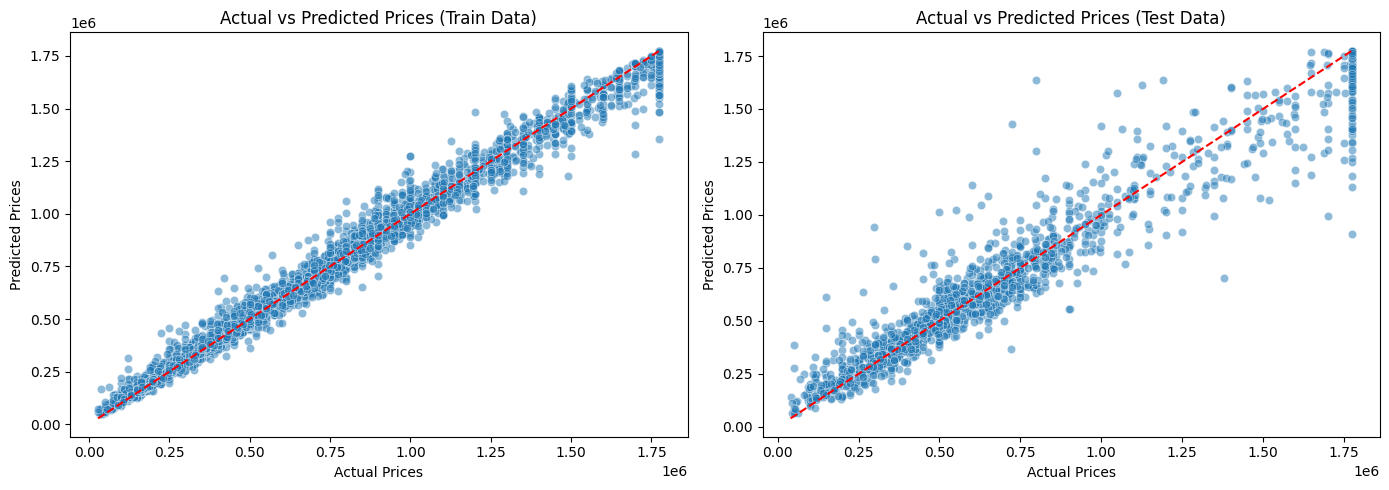

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # Create a figure with 1 row & 2 columns

# Train Data Plot
sns.scatterplot(ax=axes[0], x=y_train, y=y_train_hp_rf_pred, alpha=0.5)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--')  # Reference line
axes[0].set_xlabel("Actual Prices")
axes[0].set_ylabel("Predicted Prices")
axes[0].set_title("Actual vs Predicted Prices (Train Data)")

# Test Data Plot
sns.scatterplot(ax=axes[1], x=y_test, y=y_test_hp_rf_pred, alpha=0.5)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Reference line
axes[1].set_xlabel("Actual Prices")
axes[1].set_ylabel("Predicted Prices")
axes[1].set_title("Actual vs Predicted Prices (Test Data)")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

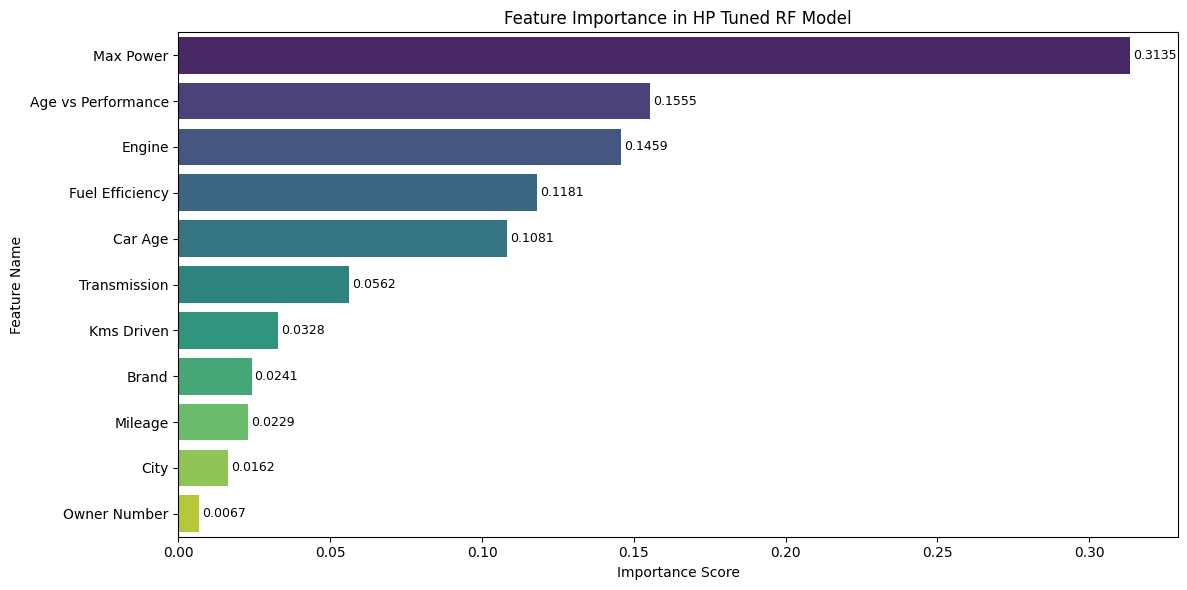

In [62]:
# Extract feature importance
feature_importance = hp_rf.feature_importances_
features = X_train.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance}).sort_values(by='Importance', ascending=False)

# Plot feature importance 
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, hue='Feature', palette='viridis', legend=False)

for index, value in enumerate(importance_df['Importance']):
    plt.text(value + 0.001, index, f'{value:.4f}', va='center', fontsize=9)

plt.title("Feature Importance in HP Tuned RF Model")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.tight_layout()
plt.show()

In [63]:
# Select only the important features to reduce overfitting
selected_features = ["Max Power", "Age vs Performance", "Engine", "Fuel Efficiency", "Car Age", "Transmission", "Kms Driven", "Brand", "Mileage"]
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [64]:
# Define base Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [75, 100, 125],  
    'max_depth': [15, 18, 20], # reducing to decrease the risk of overfitting  
    'min_samples_split': [5, 10, 15],  # Prevent excessive splits
    'min_samples_leaf': [5, 7, 10],  # Prevent small leaf nodes
    'max_features': ['sqrt', 'log2'],
    'ccp_alpha': [0.005, 0.1, 0.2], # lower values to maintain complexity while preventing overfitting
    'bootstrap': [True]
}

# Use RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_model, 
    param_distributions=param_grid, 
    n_iter=100,  
    cv=10,  # for better generalization 
    scoring='neg_mean_squared_error',
    verbose=2, 
    random_state=42, 
    n_jobs=-1
)

random_search.fit(X_train_selected, y_train)
print("Best Parameters:", random_search.best_params_)
hp_rf2 = random_search.best_estimator_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best Parameters: {'n_estimators': 125, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 18, 'ccp_alpha': 0.2, 'bootstrap': True}


In [65]:
# Predticing using the model
y_train_hp_rf2_pred = hp_rf2.predict(X_train_selected)
y_test_hp_rf2_pred = hp_rf2.predict(X_test_selected)

print('Predictions made on X_train data\n', y_train_hp_rf2_pred, '\n')
print('Predictions made on X_test data\n', y_test_hp_rf2_pred)

Predictions made on X_train data
 [430072.23365416 437575.91108118 836144.69583862 ... 748294.94079164
 413087.24720932 733046.85708844] 

Predictions made on X_test data
 [395881.98514816 140261.31109117 566356.16654533 ... 464053.04682013
 223195.41145386 794158.3887318 ]


In [66]:
# mse, mae & r2 score for train data
hp_rf2_train_mse = mean_squared_error(y_train, y_train_hp_rf2_pred)
hp_rf2_train_mae = mean_absolute_error(y_train, y_train_hp_rf2_pred)
hp_rf2_train_r2 = r2_score(y_train, y_train_hp_rf2_pred)

print('MSE:',hp_rf2_train_mse)
print('MAE:',hp_rf2_train_mae)
print('R2:',hp_rf2_train_r2, '\n')

# mse, mae & r2 score for test data
hp_rf2_test_mse = mean_squared_error(y_test, y_test_hp_rf2_pred)
hp_rf2_test_mae = mean_absolute_error(y_test, y_test_hp_rf2_pred)
hp_rf2_test_r2 = r2_score(y_test, y_test_hp_rf2_pred)

print('MSE:',hp_rf2_test_mse)
print('MAE:',hp_rf2_test_mae)
print('R2:',hp_rf2_test_r2)

MSE: 11318386783.36546
MAE: 72171.4382121652
R2: 0.951445276819125 

MSE: 18766101267.89504
MAE: 90082.75607161374
R2: 0.9274548964988616


In [67]:
hp_rf2_results = pd.DataFrame(['HP Tuned RF 2', hp_rf2_train_mse, hp_rf2_train_mae, hp_rf2_train_r2, hp_rf2_test_mse, hp_rf2_test_mae, hp_rf2_test_r2]).T
hp_rf2_results.columns = ['Model', 'Training MSE', 'Training MAE', 'Training R2', 'Testing MSE', 'Testing MAE', 'Testing R2']
hp_rf2_results

,Model,Training MSE,Training MAE,Training R2,Testing MSE,Testing MAE,Testing R2
0,HP Tuned RF 2,11318386783.365459,72171.438212,0.951445,18766101267.895039,90082.756072,0.927455


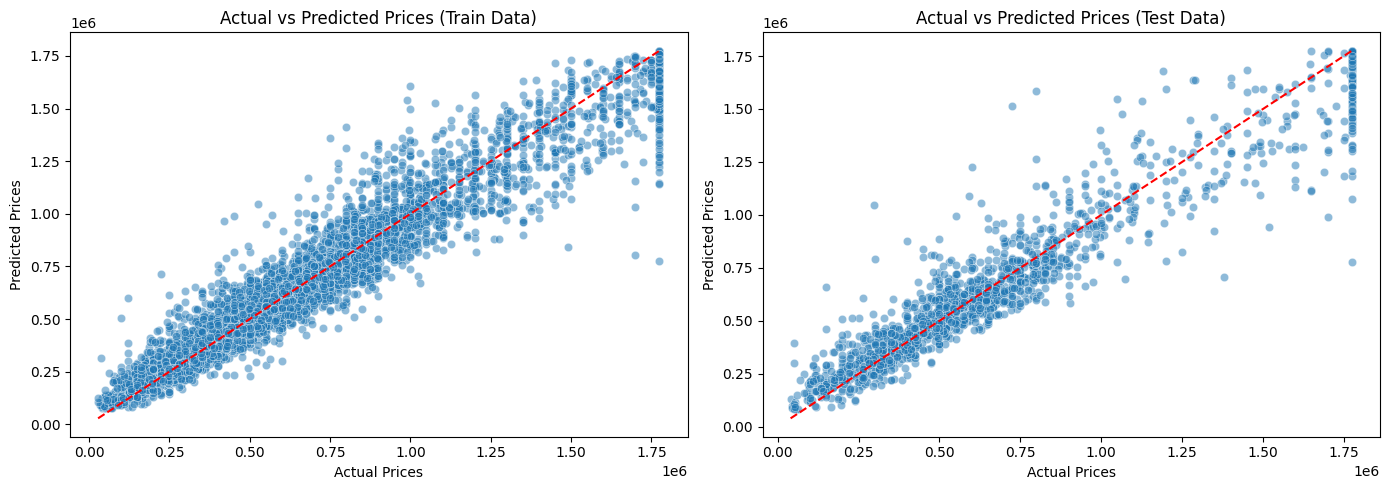

In [68]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # Create a figure with 1 row & 2 columns

# Train Data Plot
sns.scatterplot(ax=axes[0], x=y_train, y=y_train_hp_rf2_pred, alpha=0.5)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--')  # Reference line
axes[0].set_xlabel("Actual Prices")
axes[0].set_ylabel("Predicted Prices")
axes[0].set_title("Actual vs Predicted Prices (Train Data)")

# Test Data Plot
sns.scatterplot(ax=axes[1], x=y_test, y=y_test_hp_rf2_pred, alpha=0.5)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Reference line
axes[1].set_xlabel("Actual Prices")
axes[1].set_ylabel("Predicted Prices")
axes[1].set_title("Actual vs Predicted Prices (Test Data)")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

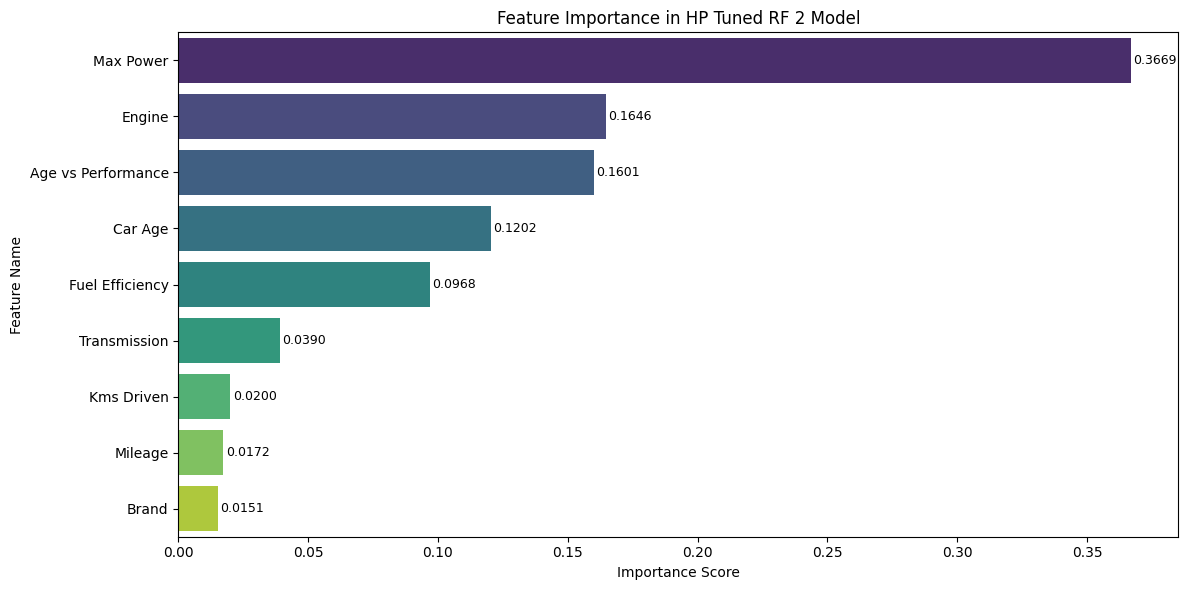

In [69]:
# Extract feature importance
feature_importance = hp_rf2.feature_importances_
features = X_train_selected.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance}).sort_values(by='Importance', ascending=False)

# Plot feature importance 
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, hue='Feature', palette='viridis', legend=False)

for index, value in enumerate(importance_df['Importance']):
    plt.text(value + 0.001, index, f'{value:.4f}', va='center', fontsize=9)

plt.title("Feature Importance in HP Tuned RF 2 Model")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.tight_layout()
plt.show()

In [70]:
comparision = pd.concat([rf_results, rf_b_results, hp_rf_results, hp_rf2_results], axis = 0).reset_index(drop=True)
comparision

,Model,Training MSE,Training MAE,Training R2,Testing MSE,Testing MAE,Testing R2
0,Random Forest,1940890920.764561,27369.704625,0.991674,14601789210.830551,74323.743455,0.943553
1,Random Forest (Base),1984920610.464543,27729.026019,0.991485,15628305061.017286,76781.8671,0.939585
2,HP Tuned RF,1966890632.243973,28787.331242,0.991562,15230121670.254887,77385.680189,0.941124
3,HP Tuned RF 2,11318386783.365459,72171.438212,0.951445,18766101267.895039,90082.756072,0.927455


### **📌 Model-Specific Analysis**
#### **OG Dataset**

**Random Forest (Default Parameters)**

- ***Performance:***
- ***Training*** → **MSE**: 1.94 B, **MAE**: 27369, **R²**: 0.991674 (Very high, indicating potential overfitting)
- ***Testing*** → **MSE**: 1.46 B, **MAE**: 74323 (Higher than training, showing overfitting), **R²**: 0.943553 (Good, but lower than training)
- ***Inference:***
- The model has a large gap between training and testing error, which confirms overfitting.
- The feature importance suggests dominance of a few features(Max Power (~0.55)), making the model potentially biased.

#### **Feature Engineering & Feature Elimination were applied**

**Random Forest (Default Parameters)**

- ***Performance:***
- ***Training*** → **MSE**: 1.98 B, **MAE**: 27729, **R²**: 0.991485
- ***Testing*** → **MSE**: 1.56 B, **MAE**: 76781, **R²**: 0.939585 (Slight drop in generalization)
- ***Inference:***
- Even with engineered features Max Power still dominates (~0.44)
- Still, the error gap remains significant, suggesting that default hyperparameters are not sufficient.

#### **Feature Engineering, Feature Elimination, & Hyperparameter Tuning were applied**

**HP Tuned Random Forest**

- ***Performance:***
- ***Training*** → **MSE**: 1.96 B, **MAE**: 28787, **R²**: 0.991562
- ***Testing*** → **MSE**: 1.52 B, **MAE**: 77385, **R²**: 0.941124 (Slight improvement over Model 1)
- ***Inference:***
- Hyperparameter tuning slightly reduced overfitting, as seen in the smaller error gap. However, the model is still overfitting
- More balanced contribution across features than before as few features gained importance.


#### **Futher Feature Elimination, & Hyperparameter Tuning were applied**

**HP Tuned Random Forest 2**

- ***Performance:***
- ***Training*** → **MSE**: 11.31 B, **MAE**: 72171, **R²**: 0.951274
- ***Testing*** → **MSE**: 18.76 B, **MAE**: 90082, **R²**: 0.927194 (Lower than Model 2 but more balanced)
- ***Inference:***
- Training error increased, but testing error did not increase significantly, showing better generalization.
- The model is less overfit than before, proving that removing weaker features improved generalization.

#### ***HP Tuned RF 2 sacrifices a bit of training performance but significantly reduces overfitting & Feature reduction helped balance the importance scores, leading to better generalization, making it the best model.***
#### ***Though the HP Tuned RF 2 is the best model it's test MAE is higher than the basic Gradient Boosting model. So, let's also try to optimize it & see which model is performing better***